In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
co = pymysql.connect(host='132.248.3.66', db='3MdB', 
                     user='OVN_user', passwd='oiii5007') 

In [63]:
res = pd.read_sql("""SELECT 
OXYGEN as O,
NITROGEN as N,
logU_mean,
Hbfrac,
atm1 as teff,
lumi,
dens,
HE_2__4686A / H__1__4861A as HeII,
TOTL__7325A/O__3__5007A as RO,
(S_II__6731A+S_II__6716A)/S__3__6312A as RS,
TOTL__4363A/O__3__5007A as RO3,
N__2__5755A/N__2__6584A as RN2,
O__3__5007A/H__1__4861A as O3,
N__2__6584A/H__1__4861A as N2
FROM tab 
WHERE ref like 'PNe_2014' 
AND abs(HE_2__4686A/H__1__4861A - 0.7) / 0.7 < 0.3
AND abs(TOTL__7325A/O__3__5007A - 0.0095) / 0.0095 < 0.3 
AND abs((S_II__6731A+S_II__6716A)/S__3__6312A - 15 ) / 15 < 0.3
AND abs(TOTL__4363A/O__3__5007A - 0.033) / 0.033 < 0.5
AND abs(N__2__5755A/N__2__6584A - 0.019) / 0.019 < 0.5
AND abs(O__3__5007A/H__1__4861A - 8.5) / 8.5 < 0.3
AND abs(N__2__6584A/H__1__4861A - 4.5) / 4.5 < 0.3
""", 
con=co)

In [64]:
len(res)

6

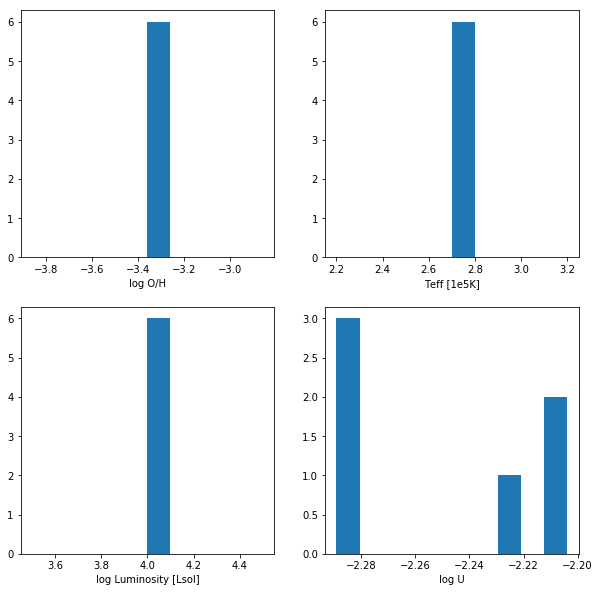

In [65]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.hist(res['O'])
ax1.set_xlabel('log O/H')
ax2.hist(res['teff']/1e5)
ax2.set_xlabel('Teff [1e5K]')
ax3.hist(res['lumi'])
ax3.set_xlabel('log Luminosity [Lsol]')
ax4.hist(res['logU_mean'])
ax4.set_xlabel('log U');

In [66]:
def khi(label, obs):
    return (res[label] - obs)/obs

khi2 = np.sqrt(khi('HeII', 0.7)**2 + 
               khi('RO', 8/850.)**2 +
               khi('RS', 15)**2 +
               khi('RO3', 28/850)**2 +
               khi('RN2', 0.019)**2 +
               khi('O3', 8.5)**2 +
               khi('N2', 4.5)**2) / 6.
res['khi2'] = khi2
print(res)


      O     N  logU_mean  Hbfrac      teff  lumi  dens      HeII        RO  \
0 -3.36 -3.75   -2.22243     1.0  270000.0   4.0   0.0  0.791698  0.012270   
1 -3.36 -3.75   -2.28848     1.0  270000.0   4.0   0.0  0.775320  0.012320   
2 -3.36 -3.75   -2.28488     1.0  270000.0   4.0   0.0  0.781000  0.012267   
3 -3.36 -3.75   -2.28914     1.0  270000.0   4.0   0.0  0.776844  0.012303   
4 -3.36 -3.75   -2.20393     1.0  270000.0   4.0   0.0  0.791737  0.012345   
5 -3.36 -3.75   -2.20938     1.0  270000.0   4.0   0.0  0.791171  0.012334   

          RS       RO3       RN2         O3        N2      khi2  
0  12.409950  0.016579  0.021620  10.691379  3.150500  0.124868  
1  14.434181  0.016590  0.020931  10.502603  3.262364  0.117417  
2  13.621866  0.016590  0.021173  10.596078  3.216346  0.119666  
3  14.268723  0.016590  0.020996  10.528206  3.248527  0.117911  
4  12.570666  0.016574  0.021577  10.658293  3.181201  0.124292  
5  12.610334  0.016576  0.021557  10.656535  3.181529  0.